<a href="https://colab.research.google.com/github/ju-arauj/swot/blob/master/ML7_ex_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Proficiência em matemática de alunos do quinto do ensino fundamental com base em variáveis da base de dados do SAEB***
---

In [15]:
#@title Identificação do Grupo

#@markdown Integrantes do Grupo (*informe \<TIA\>,\<nome\>*)
Aluno1 = '10444671, Julia Raissa Silva de Araujo' #@param {type:"string"}
Aluno2 = '10441586, Mariana Silva de Oliveira' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Apresentação**

# Problema

*É possível prever o desempenho em matemática de um aluno do quinto com base em quanto tempo ele se dedica ao estudo, se os pais o incentivam a estudar, no gênero e na etnia deste aluno ou no grau de escolaridade dos pais dele? Propomos o desafio de responder a essa pergunta utlizando a base de dados do Sistema de Avaliação da Educação Básica (SAEB), que traz dados socioeconômicos dos alunos do quinto ano do EF que realizaram as avaliações do SAEB, além do desempenho deles em matemática..*



# Referencial Teórico

*Utilizados o livro Python para Data Science, de Amilcar Netto e Francisco Maciel como aporte teórico neste projeto. Nesta obra, os autores apresentam teoricamente os modelos de aprendizado de máquina e fornecem exemplos de como aplicá-los.*

# Metodologia

*Apresente e discuta a abordagem de solução empregada. Discuta os dados empregados, tratamento efetuados, variáveis preditoras e objetivo, técnicas empregadas.*



# Resultados

*Resuma aqui os resultados, principalmente incluindo tabelas e esquemas necessários.*

# **Implementação**

# Base de Dados

*Descreva aqui os dados utilizados, discuta eventuais transformações e/ou seleções dos dados e preparações nos dados.*




In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [17]:
#carregando o dataset
df = pd.read_csv('/content/drive/MyDrive/TS_ALUNO_5EF.csv', sep = ';')
display(df.head())
display(df.shape)
display(df.duplicated().sum())

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_SERIE,...,TX_RESP_Q20e,TX_RESP_Q21a,TX_RESP_Q21b,TX_RESP_Q21c,TX_RESP_Q21d,TX_RESP_Q21e,TX_RESP_Q21f,TX_RESP_Q21g,TX_RESP_Q21h,TX_RESP_Q21i
0,2021,1,11,6316600,2,61324549,1,1,1324376,5,...,D,D,D,D,D,D,D,D,D,D
1,2021,1,11,6316600,2,61324549,1,1,1324376,5,...,.,.,.,.,.,.,.,.,.,.
2,2021,1,11,6316600,2,61324549,1,1,1324376,5,...,.,.,.,.,.,.,.,.,.,.
3,2021,1,11,6316600,2,61324549,1,1,1324376,5,...,B,*,C,B,C,*,C,C,D,C
4,2021,1,11,6316600,2,61324549,1,1,1324376,5,...,C,C,D,A,D,C,B,C,D,A


(1048575, 104)

0

## Tratamento da base de dados
* Excluir colunas que não consideramos relevantes
* Renomear as colunas
* Excluir valores nulos
* Identificação e exclusão de outliers
* Tratamento das variáveis categóricas (one hot encoding)
* Criar a coluna com a variável target

In [18]:
df = df.drop(columns=['ID_SAEB', 'TX_RESP_Q10a', 'TX_RESP_Q10b', 'TX_RESP_Q10c','ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_ESCOLA', 'ID_TURMA', 'ID_SERIE', 'ID_ALUNO', 'IN_SITUACAO_CENSO', 'IN_PREENCHIMENTO_LP', 'IN_PREENCHIMENTO_MT', 'IN_PRESENCA_LP', 'IN_PRESENCA_MT', 'ID_CADERNO_LP', 'ID_BLOCO_1_LP', 'ID_BLOCO_2_LP', 'ID_CADERNO_MT', 'ID_BLOCO_1_MT', 'ID_BLOCO_2_MT', 'TX_RESP_BLOCO1_LP','TX_RESP_BLOCO2_LP', 'TX_RESP_BLOCO1_MT', 'TX_RESP_BLOCO2_MT', 'IN_PROFICIENCIA_LP', 'IN_PROFICIENCIA_MT',  'IN_AMOSTRA', 'ESTRATO', 'PESO_ALUNO_LP', 'PROFICIENCIA_LP', 'ERRO_PADRAO_LP', 'ERRO_PADRAO_LP_SAEB', 'PESO_ALUNO_MT', 'PROFICIENCIA_MT', 'ERRO_PADRAO_MT', 'ERRO_PADRAO_MT_SAEB', 'IN_PREENCHIMENTO_QUESTIONARIO', 'IN_INSE', 'INSE_ALUNO', 'NU_TIPO_NIVEL_INSE', 'PESO_ALUNO_INSE', 'TX_RESP_Q02', 'TX_RESP_Q06a', 'TX_RESP_Q06b', 'TX_RESP_Q06c', 'TX_RESP_Q06d', 'TX_RESP_Q06e', 'TX_RESP_Q09a', 'TX_RESP_Q09b',  'TX_RESP_Q09e', 'TX_RESP_Q09f', 'TX_RESP_Q11a', 'TX_RESP_Q11b', 'TX_RESP_Q11c', 'TX_RESP_Q11d', 'TX_RESP_Q11e', 'TX_RESP_Q11f', 'TX_RESP_Q11g', 'TX_RESP_Q11h','TX_RESP_Q12a', 'TX_RESP_Q12c', 'TX_RESP_Q12d', 'TX_RESP_Q12e', 'TX_RESP_Q12f', 'TX_RESP_Q12g', 'TX_RESP_Q12h', 'TX_RESP_Q12i', 'TX_RESP_Q13','TX_RESP_Q14', 'TX_RESP_Q15', 'TX_RESP_Q16', 'TX_RESP_Q17', 'TX_RESP_Q19', 'TX_RESP_Q20b', 'TX_RESP_Q20c', 'TX_RESP_Q20d', 'TX_RESP_Q20e','TX_RESP_Q21a', 'TX_RESP_Q21b', 'TX_RESP_Q21c', 'TX_RESP_Q21d', 'TX_RESP_Q21e', 'TX_RESP_Q21f', 'TX_RESP_Q21g', 'TX_RESP_Q21h', 'TX_RESP_Q21i'])

In [19]:
df = df.dropna()
df.shape

(799342, 16)

In [20]:
df.columns

Index(['ID_AREA', 'IN_PUBLICA', 'ID_LOCALIZACAO', 'PROFICIENCIA_LP_SAEB',
       'PROFICIENCIA_MT_SAEB', 'TX_RESP_Q01', 'TX_RESP_Q03', 'TX_RESP_Q04',
       'TX_RESP_Q05', 'TX_RESP_Q07', 'TX_RESP_Q08', 'TX_RESP_Q09c',
       'TX_RESP_Q09d', 'TX_RESP_Q12b', 'TX_RESP_Q18', 'TX_RESP_Q20a'],
      dtype='object')

In [21]:
df.columns = ['Área', 'Pública ou privada?', 'Urbana ou rural?', 'Proficiência_Português', 'Proficiência_Matemática', 'Gênero', 'Qual língua seus pais falam com mais frequência em casa?', 'Qual é a sua cor ou raça?',
              'Você possui algum tipo de necessidade especial?', 'Escolaridade da mãe (ou mulher responsável)', 'Escolaridade do pai (ou homem responsável)',
              'Seus pais costumam incentivar você a estudar?','Seus pais costumam incentivar você a fazer a tarefa de casa?',
              'Na sua casa tem rede Wi-Fi?', 'Você já foi reprovado(a)?', 'Quanto tempo você usa para estudar?' ]

In [22]:
df.head()

,Área,Pública ou privada?,Urbana ou rural?,Proficiência_Português,Proficiência_Matemática,Gênero,Qual língua seus pais falam com mais frequência em casa?,Qual é a sua cor ou raça?,Você possui algum tipo de necessidade especial?,Escolaridade da mãe (ou mulher responsável),Escolaridade do pai (ou homem responsável),Seus pais costumam incentivar você a estudar?,Seus pais costumam incentivar você a fazer a tarefa de casa?,Na sua casa tem rede Wi-Fi?,Você já foi reprovado(a)?,Quanto tempo você usa para estudar?
0,2,1,1,230.713.772,243.703.155,B,A,F,B,D,D,B,B,B,A,B
3,2,1,1,162.714.073,148.990.699,B,A,F,B,C,D,C,C,B,A,B
4,2,1,1,20.245.253,207.349.611,B,A,F,B,F,F,C,C,B,A,B
5,2,1,1,125.432.835,197.371.768,A,A,C,B,F,F,C,A,B,A,B
6,2,1,1,197.157.672,201.004.267,A,A,A,B,F,F,C,C,B,A,C


In [23]:
#Retirando os valores brancos e nulos de algumas colunas, que estão representados por "." e "*".
df.replace({'.': np.nan, '*': np.nan}, inplace=True)
df.dropna(inplace=True)

In [24]:
df.shape

(569321, 16)

## **Modelo 1**

*Descreva resumidamente o modelo empregado.*


### **Modelo 1:** Preparação dos Dados


In [25]:
#Agora não temos mais valores nulos. Vamos plotar gráficos das 2 variáveis numéricas de nossa base de dados para analisar a distribuição dos dados.
variaveis_numericas = df.select_dtypes(['float64'])
variaveis_numericas

""
0
3
4
5
6
...
1048569
1048570
1048572
1048573


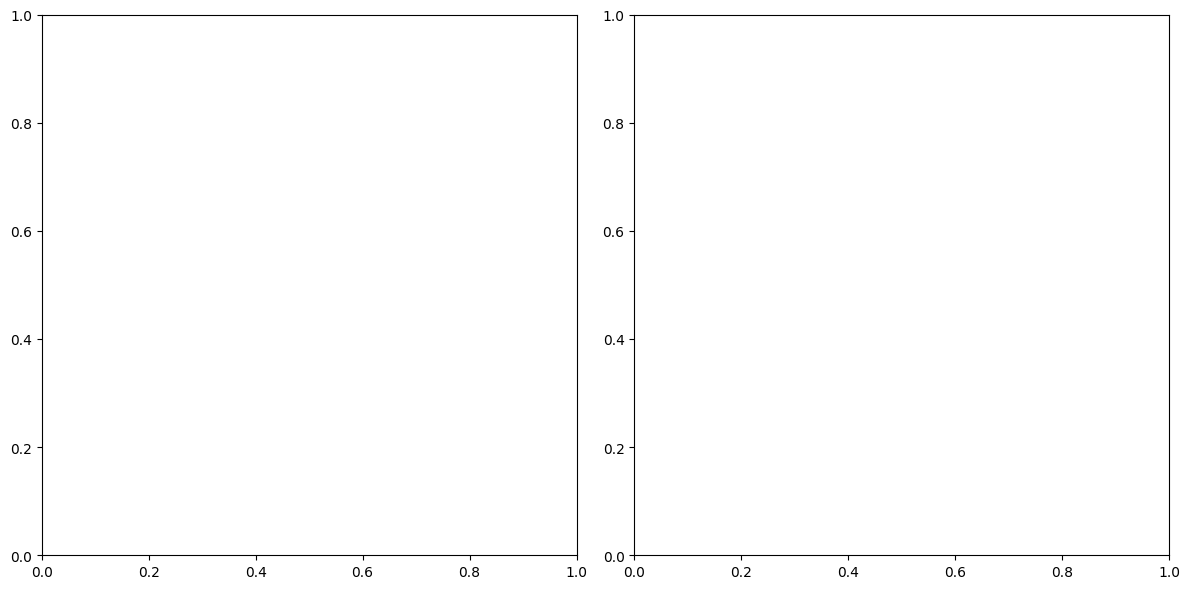

In [26]:
num_plots = len(variaveis_numericas.columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotando boxplots para todas as colunas, divididos em 2 subgráficos
for i, col in enumerate(variaveis_numericas.columns):
    sns.boxplot(ax=axes[i % 2], data=variaveis_numericas[col])  # Boxplot para cada coluna
    axes[i % 2].set_title(f'Boxplot de {col}')

# Ajustar layout e exibir

plt.tight_layout()
plt.show()

Percebemos que não há outliers nas notas de desempenho em português, mas há, sim, valores mais altos que o "normal" em matemática. Como o modelo de regressão logística é sensível a outliers, vamos excluir esses valores.


### Identificando os outliers usando o método IQR.
Para dropar todos esses pontos fora da curva, vamos substituí-los por um valor nulo e então excluí-los da base utilizando o método dropna() do pandas.

In [27]:
def identificador_outliers(dataset, col):
  quartil_25, quartil_75 = np.quantile(dataset[col], 0.25), np.quantile(dataset[col], 0.75) #calculando o primeiro e o terceiro quartil de cada variável
  iqr = quartil_75 - quartil_25 #calculando o IQR

  #Definindo os valores máximos e mínimo para que um dado seja considerado "normal". Se o dado estiver acima ou abaixo dos limites inferior e superior, será cnsiderado um outilier.
  limite_inferior = quartil_25 - (iqr * 1.5)
  limite_superior = quartil_75 + (iqr * 1.5)

  outliers = [] #lista onde os outliers serão armazenados

  for i in dataset[col].values:
    if ((i > limite_superior) or (i < limite_inferior)):
      outliers.append(i)
      dataset[col] = dataset[col].replace(i, np.nan) #substituindo os outliers por valores nulos

  print(f'Número de outliers encontrado: {len(outliers)}.')
  print(f'Nulos da variável {col}: {dataset[col].isnull().sum()}.') #Verificando se o número de nulos na variável é igual ao de outliers encontrados para garantir que a substituição foi feita corretamente

In [28]:
identificador_outliers(df, 'Proficiência_Matemática')

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> None

In [ ]:
#removando os outliers
df.dropna(inplace=True)
df.shape

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, y='Proficiência_Matemática', palette = 'ocean')
plt.title("Distribuição de médias de proficiência em matemática (sem outliers)", fontsize=14, weight = 'bold')
plt.ylabel(" ")
plt.tight_layout()
plt.show()

###Tratamento das variáveis categóricas
Que são maioria na nossa base de dados. Vamos substituir os valores das classes de cada coluna, caso a caso.

In [ ]:
df.columns

In [ ]:
df[['Área', 'Urbana ou rural?']] = df[['Área', 'Urbana ou rural?']].replace(2, 0)
df['Gênero'] = df['Gênero'].replace({'A': 'Masculino', 'B':'Feminino'})
df['Qual língua seus pais falam com mais frequência em casa?'] = df['Qual língua seus pais falam com mais frequência em casa?'].replace({'A':'Português', 'B':'Espanhol', 'C':'Outra'})
df['Qual é a sua cor ou raça?'] = df['Qual é a sua cor ou raça?'].replace({'A': 'Branca', 'B':'Preta', 'C':'Parda', 'D':'Amarela', 'E':'Indígena', 'F':np.nan})
df['Você possui algum tipo de necessidade especial?'] = df['Você possui algum tipo de necessidade especial?'].replace({'A':'Sim', 'B':'Não'})
df[['Escolaridade da mãe (ou mulher responsável)',
    'Escolaridade do pai (ou homem responsável)']] = df[['Escolaridade da mãe (ou mulher responsável)',
    'Escolaridade do pai (ou homem responsável)']].replace({'A': np.nan, 'B': np.nan, 'C': 'EF completo', 'D': 'EM completo', 'E': 'ES completo', 'F':np.nan})
df[['Seus pais costumam incentivar você a estudar?', 'Seus pais costumam incentivar você a fazer a tarefa de casa?']] = df[['Seus pais costumam incentivar você a estudar?', 'Seus pais costumam incentivar você a fazer a tarefa de casa?']].replace({'A': 'Não', 'B':'Não', 'C': 'Sim'})
df['Na sua casa tem rede Wi-Fi?'] = df['Na sua casa tem rede Wi-Fi?'].replace({'A':'Não', 'B':'Sim'})
df['Você já foi reprovado(a)?'] = df['Você já foi reprovado(a)?'].replace({'A':'Não', 'B':'Sim', 'C':'Sim'})
df['Quanto tempo você usa para estudar?'] = df['Quanto tempo você usa para estudar?'].replace({'A':'Nenhum', 'B':'Menos de 1 hora', 'C': 'Mais de 1 hora', 'D': 'Mais de 1 hora'})


In [ ]:
#Excluindo os novos valores nulos
df.dropna(inplace=True)

In [ ]:
display(df.shape)
display(df.head())
display(df.tail())

In [ ]:
encoder = OneHotEncoder(sparse_output=False, dtype=int)  # sparse_output=False para obter um array numpy denso

one_hot_encoded = encoder.fit_transform(df[['Gênero', 'Qual língua seus pais falam com mais frequência em casa?', 'Qual é a sua cor ou raça?',
       'Você possui algum tipo de necessidade especial?','Escolaridade da mãe (ou mulher responsável)',
       'Escolaridade do pai (ou homem responsável)',
       'Seus pais costumam incentivar você a estudar?',
       'Seus pais costumam incentivar você a fazer a tarefa de casa?',
       'Na sua casa tem rede Wi-Fi?', 'Você já foi reprovado(a)?', 'Quanto tempo você usa para estudar?']])

# Convertendo o array numpy de volta para um DataFrame do pandas
df_encoded = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Gênero', 'Qual língua seus pais falam com mais frequência em casa?', 'Qual é a sua cor ou raça?',
       'Você possui algum tipo de necessidade especial?','Escolaridade da mãe (ou mulher responsável)',
       'Escolaridade do pai (ou homem responsável)',
       'Seus pais costumam incentivar você a estudar?',
       'Seus pais costumam incentivar você a fazer a tarefa de casa?',
       'Na sua casa tem rede Wi-Fi?', 'Você já foi reprovado(a)?',
       'Quanto tempo você usa para estudar?']))
df_encoded


In [ ]:
df_temp = df.drop(columns=['Gênero', 'Qual língua seus pais falam com mais frequência em casa?', 'Qual é a sua cor ou raça?',
       'Você possui algum tipo de necessidade especial?','Escolaridade da mãe (ou mulher responsável)',
       'Escolaridade do pai (ou homem responsável)',
       'Seus pais costumam incentivar você a estudar?',
       'Seus pais costumam incentivar você a fazer a tarefa de casa?',
       'Na sua casa tem rede Wi-Fi?', 'Você já foi reprovado(a)?',
       'Quanto tempo você usa para estudar?'])
df_encoded = df_encoded.reset_index(drop=True)
df_temp = df_temp.reset_index(drop=True)
df_concatenado = pd.concat([df_temp, df_encoded], axis=1)
df_concatenado.head()

In [ ]:
df_final = df_concatenado.drop(columns=['Gênero_Masculino', 'Você possui algum tipo de necessidade especial?_Não','Seus pais costumam incentivar você a estudar?_Não',
                             'Seus pais costumam incentivar você a fazer a tarefa de casa?_Não','Você já foi reprovado(a)?_Não',
                                        'Na sua casa tem rede Wi-Fi?_Não'])
df_final.head()

### Gerando a variável target
que traz a seguinte informação:  se o aluno apresenta proficiência em matemática acima ou igual à média, é classificado como 1. Se não, é classificado como 0.

In [ ]:
media_matematica = df['Proficiência_Matemática'].mean()
df['target'] = df['Proficiência_Matemática'].apply(lambda x: 1 if x >= media_matematica else 0)
df.drop(columns='Proficiência_Matemática', inplace=True)
df.head()


In [ ]:
#Verificando a proporção da variável target

sns.countplot(x='target', data=df, palette='magma')
plt.show()

Como podemos obervar pelo gráfico, as classes da variável target estão balanceadas, não havendo grande diferença na quantidade delas. Portanto, não precisaremos fazer nenhum ajuste de balanceamento ao aplicarmos o modelo de regressã logística.

###Conferindo a proporção das classes em cada variável para ter uma ideia do quanto estão balanceadas.

In [ ]:
variaveis_categoricas = df_final.select_dtypes(['int'])
#for col in df_final.columns:
  #display(df_final[col].value_counts(normalize=True))
for col in variaveis_categoricas:
  sns.countplot(data=variaveis_categoricas, x=col, palette='ocean')
  plt.title(f"Distribuição - {col}", fontsize = 14)
  plt.xlabel("")
  plt.ylabel("")
  plt.tight_layout()
  plt.show()

### **Modelo 1:** Modelo


In [ ]:
#Aplicando o modelo de regressão logistica

X = df_final.drop(columns = 'target')
y = df_final.target

#Separando 30% dos dados para teste e 70% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.3, random_state=90)

clf = LogisticRegression(max_iter=500)

#Ajustando o modelo aos dados
clf.fit(X_train, y_train)

#Fazendo predições
y_pred = clf.predict(X_test)

### **Modelo 1:** Resultados


In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot = True)
plt.show()

In [ ]:
acuracia = accuracy_score(y_test, y_pred)
relatorio = classification_report(y_test, y_pred)
print(acuracia)
print(relatorio)

In [ ]:
#Decidimos testar o modelo considerando apenas as variáveis cujas classes não apresentam proporções muito discrepantes.

X1 = df_final[['Gênero_Feminino','Qual é a sua cor ou raça?_Branca', 'Qual é a sua cor ou raça?_Parda','Escolaridade da mãe (ou mulher responsável)_EF completo',
                             'Escolaridade da mãe (ou mulher responsável)_EM completo', 'Escolaridade da mãe (ou mulher responsável)_ES completo',
                             'Escolaridade do pai (ou homem responsável)_EF completo',
                             'Escolaridade do pai (ou homem responsável)_EM completo',
                             'Escolaridade do pai (ou homem responsável)_ES completo', 'Quanto tempo você usa para estudar?_Mais de 1 hora',
'Quanto tempo você usa para estudar?_Menos de 1 hora']]
y1 = df_final.target

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, stratify=y1, shuffle=True, test_size=0.3, random_state=90)

clf = LogisticRegression()

clf.fit(X1_train, y1_train)

y1_pred = clf.predict(X1_test)

In [ ]:
cm = confusion_matrix(y1_test, y1_pred)
sns.heatmap(data=cm, annot = True)
plt.show()

In [ ]:
acuracia = accuracy_score(y1_test, y1_pred)
relatorio = classification_report(y1_test, y1_pred)
print(acuracia)
print(relatorio)

## **Modelo 2**

*Descreva resumidamente o modelo empregado.*


### **Modelo 2:** Preparação dos Dados


In [ ]:
# seu código

### **Modelo 2:** Modelo


In [ ]:
X = df_final.drop(columns='target')
y = df_final.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=90)

clf = DecisionTreeClassifier(criterion='entropy',max_depth=10)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

In [ ]:
X = df_final[['Gênero_Feminino','Qual é a sua cor ou raça?_Branca', 'Qual é a sua cor ou raça?_Parda','Escolaridade da mãe (ou mulher responsável)_EF completo',
                             'Escolaridade da mãe (ou mulher responsável)_EM completo', 'Escolaridade da mãe (ou mulher responsável)_ES completo',
                             'Escolaridade do pai (ou homem responsável)_EF completo',
                             'Escolaridade do pai (ou homem responsável)_EM completo',
                             'Escolaridade do pai (ou homem responsável)_ES completo', 'Quanto tempo você usa para estudar?_Mais de 1 hora',
'Quanto tempo você usa para estudar?_Menos de 1 hora']]
y = df_final.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=90)

clf = DecisionTreeClassifier(criterion='entropy',max_depth=10)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

### **Modelo 2:** Resultados


In [ ]:
# seu código

# **Conclusão**

*Embora o desempenho do modelo tenha sido pior no segundo caso de regressão logistica, as variáveis utilizadas parecem ser mais adequadas por explicarem um pouco mais a variável dependente. Concluímos que o modelo de regressão logística não é uma boa opção para este caso e que as variável, no geral, não explicam bem a variável target.*



# **Referências**

*Indique as referências empregadas, incluindo as fontes de dados.*

---

In [ ]:
#@title Avaliação
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown Projeto cumpre todos os itens pedidos.
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As seleções de dados e eventos para análise são relevantes e justificados.
Tecnicas = 6 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de empregadas são adequadas e corretamente aplicadas.
Apresentacao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva.
Analise = 8 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As premissas de análise se justificam e a analise é correta.
Conclusao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados








In [ ]:
#@markdown ### Nota Final
nota = Completo + Relevancia + Tecnicas + Apresentacao + Analise + Conclusao

nota = nota / 6 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
alunos